Task_2

Download the event_data.csv dataset, which contains data on the use of the mobile application of users who registered from July 29 to September 1, 2019: • user_id - user identifier; • event_date - time of the event; • event_type - type of event: registration - registration in the application; simple_event - click event in the application; purchase - an event of purchase within the application; purchase_amount - purchase amount.

Highlight user cohorts based on the week of registration in the application. The cohort identifier should be the week ordinal (for example, the week from July 29 to August 4 should have identifier 31).

How many unique users in the cohort with ID 33?

For each event, highlight the indicator lifetime - the weekly lifetime of the cohort. The lifetime indicator is calculated based on the serial number of the week in which the event is committed, relative to the week of registration. For example, an event committed on August 3 by a user from a cohort of registrants at 31 weeks will be committed on the zero week of lifetime, and an event committed by the same user on August 5 will be committed on the first week of lifetime).

Build a summary table of changes in the Retention Rate for cohorts depending on lifetime.

What is the 3 week retention rate for a cohort with ID 32? Give the answer in percent, rounded to 2 decimal places, inclusive.

Build a summary table of changes in the indicator ARPPU (Average Revenue Per Paying User) for cohorts depending on lifetime.

What is the 3-week ARPPU of a cohort with ID 31? Give the answer with a floating point number, rounded to 2 decimal places, inclusive.

What is the median time between user registration and first purchase? Give the answer in seconds (!) As an integer.

In [ ]:
# Python version
from platform import python_version
print(python_version())

3.9.7


In [ ]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\User\anaconda3\python.exe
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


In [ ]:
# To update a package, run the command below in a terminal or command prompt:
# pip install -U package_name

# To install the exact version of a package, run the command below in a terminal or command prompt:
# !pip install package_name==desired_version

# After installing or updating the package, restart the jupyter notebook.

# Install the watermark package.
# This package is used to write versions of other packages used in this jupyter notebook.
!pip install -q -U watermark

In [ ]:
# import libraries 
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Package versions used in this jupyter notebook
%reload_ext watermark
%watermark -a "Praktikum Project" --iversions

Author: Praktikum Project

matplotlib: 3.4.3
pandas    : 1.4.2
seaborn   : 0.11.2
sys       : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
numpy     : 1.22.3



# 1 - Download the event_data.csv dataset, which contains data on the use of the mobile application of users who registered from July 29 to September 1, 2019:• user_id - user identifier; • event_date - time of the event; • event_type - type of event: registration - registration in the application; simple_event - click event in the application; purchase -an event of purchase within the application; purchase_amount - purchase amount.

In [ ]:
event_data = pd.read_csv('event_data.csv')

In [ ]:
################################################################################################################################

In [ ]:
event_data.shape

(79742, 4)

In [ ]:
event_data.head(2)

,user_id,event_date,event_type,purchase_amount
0,c40e6a,2019-07-29 00:02:15,registration,NaN
1,a2b682,2019-07-29 00:04:46,registration,NaN


In [ ]:
event_data.tail(2)

,user_id,event_date,event_type,purchase_amount
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN
79741,d799dc,2019-09-01 23:59:54,simple_event,NaN


In [ ]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79742 entries, 0 to 79741
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          79742 non-null  object 
 1   event_date       79742 non-null  object 
 2   event_type       79742 non-null  object 
 3   purchase_amount  6207 non-null   float64
dtypes: float64(1), object(3)
memory usage: 2.4+ MB


In [ ]:
event_data["event_date"] = pd.to_datetime(event_data["event_date"])

In [ ]:
#check
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79742 entries, 0 to 79741
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          79742 non-null  object        
 1   event_date       79742 non-null  datetime64[ns]
 2   event_type       79742 non-null  object        
 3   purchase_amount  6207 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.4+ MB


# 2 - Highlight user cohorts based on the week of registration in the application. The cohort identifier should be the week ordinal (for example, the week from July 29 to August 4 should have identifier 31).

In [ ]:
event_data['event_date'] = pd.to_datetime(event_data['event_date'], format='%Y-%m-%d %H:%M:%S')
event_data['week'] = [int(i) + 1 for i in event_data['event_date'].dt.strftime('%W')]

In [ ]:
event_data

,user_id,event_date,event_type,purchase_amount,week
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31
1,a2b682,2019-07-29 00:04:46,registration,NaN,31
2,9ac888,2019-07-29 00:13:22,registration,NaN,31
3,93ff22,2019-07-29 00:16:47,registration,NaN,31
4,65ef85,2019-07-29 00:19:23,registration,NaN,31
...,...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN,35
79738,a84999,2019-09-01 23:57:50,simple_event,NaN,35
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN,35
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN,35


In [ ]:
event_data_cohort = event_data[event_data['event_type'] == 'registration']
event_data_cohort = event_data_cohort[['user_id', 'week']]
event_data_cohort.columns= ['user_id', 'cohort_identifier']

In [ ]:
event_data_cohort

,user_id,cohort_identifier
0,c40e6a,31
1,a2b682,31
2,9ac888,31
3,93ff22,31
4,65ef85,31
...,...,...
79697,a7c20c,35
79703,03e836,35
79710,fb0e00,35
79712,46b4f8,35


In [ ]:
event_data = event_data.merge(event_data_cohort, how='left', on='user_id')

In [ ]:
event_data

,user_id,event_date,event_type,purchase_amount,week,cohort_identifier
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31,31
1,a2b682,2019-07-29 00:04:46,registration,NaN,31,31
2,9ac888,2019-07-29 00:13:22,registration,NaN,31,31
3,93ff22,2019-07-29 00:16:47,registration,NaN,31,31
4,65ef85,2019-07-29 00:19:23,registration,NaN,31,31
...,...,...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN,35,32
79738,a84999,2019-09-01 23:57:50,simple_event,NaN,35,33
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN,35,32
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN,35,33


In [ ]:
################################################################################################################################

# 3 How many unique users in the cohort with ID 33?

In [ ]:
event_data['cohort_identifier'].value_counts()[33]

18967

In [ ]:
################################################################################################################################

# 4 For each event, highlight the indicator lifetime - the weekly lifetime of the cohort. The lifetime indicator is calculated based on the serial number of the week in which the event is committed, relative to the week of registration. For example, an event committed on August 3 by a user from a cohort of registrants at 31 weeks will be committed on the zero week of lifetime, and an event committed by the same user on August 5 will be committed on the first week of lifetime).

In [ ]:
event_data['lifetime'] = event_data['week'] - event_data['cohort_identifier']

In [ ]:
event_data

,user_id,event_date,event_type,purchase_amount,week,cohort_identifier,lifetime
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31,31,0
1,a2b682,2019-07-29 00:04:46,registration,NaN,31,31,0
2,9ac888,2019-07-29 00:13:22,registration,NaN,31,31,0
3,93ff22,2019-07-29 00:16:47,registration,NaN,31,31,0
4,65ef85,2019-07-29 00:19:23,registration,NaN,31,31,0
...,...,...,...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN,35,32,3
79738,a84999,2019-09-01 23:57:50,simple_event,NaN,35,33,2
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN,35,32,3
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN,35,33,2


# 5 - Build a summary table of changes in the Retention Rate for cohorts depending on lifetime.

In [ ]:
conclusion = event_data.pivot_table(index = ['cohort_identifier','lifetime'], 
                          aggfunc = {'user_id':'nunique'}).reset_index() 

In [ ]:
conclusion

,cohort_identifier,lifetime,user_id
0,31,0,1975
1,31,1,1832
2,31,2,1243
3,31,3,705
4,31,4,297
5,32,0,1952
6,32,1,1814
7,32,2,1265
8,32,3,705
9,33,0,2045


![Sem%20t%C3%ADtulo1.png](attachment:Sem%20t%C3%ADtulo1.png)

In [ ]:
initial_users_id = conclusion[conclusion['lifetime'] == 0]
initial_users_id = initial_users_id[['cohort_identifier','user_id']]
initial_users_id = initial_users_id.rename(columns={'user_id':'cohort_users'}) 
initial_users_id 

,cohort_identifier,cohort_users
0,31,1975
5,32,1952
9,33,2045
12,34,1974
14,35,2050


In [ ]:
conclusion = conclusion.merge(initial_users_id,on='cohort_identifier')
conclusion['retention_rate'] = conclusion['user_id']/conclusion['cohort_users'] 
retention_rate = conclusion.pivot_table(index='cohort_identifier',
                                        columns='lifetime',
                                        values='retention_rate',
                                        aggfunc='sum') 

In [ ]:
retention_rate

lifetime,0,1,2,3,4
cohort_identifier,,,,,
31,1.0,0.927595,0.629367,0.356962,0.15038
32,1.0,0.929303,0.648053,0.361168,NaN
33,1.0,0.924205,0.661125,NaN,NaN
34,1.0,0.929078,NaN,NaN,NaN
35,1.0,NaN,NaN,NaN,NaN


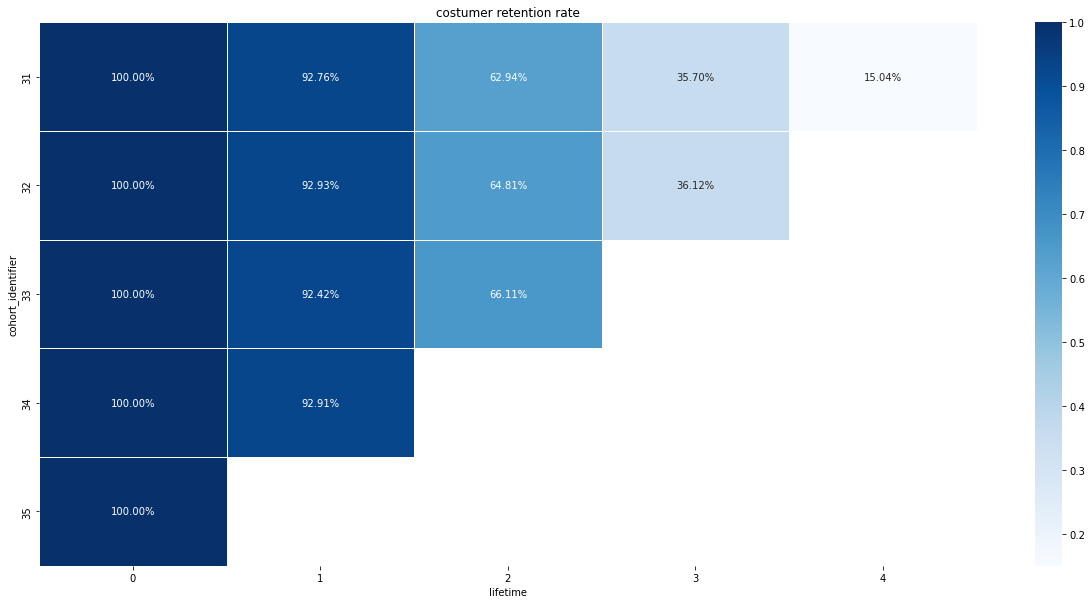

In [ ]:
plt.figure(figsize=(21,10))
plt.title('costumer retention rate')
sns.heatmap(retention_rate.iloc[:, :], annot=True, 
            fmt='.2%', linewidths=1, cmap='Blues'); 

# 6 What is the 3 week retention rate for a cohort with ID 32? Give the answer in percent, rounded to 2 decimal places, inclusive.

In [ ]:
str(round(((retention_rate.loc[33,2])*100),2)) + ' %'

'66.11 %'

In [ ]:
################################################################################################################################

# 7- Build a summary table of changes in the indicator ARPPU (Average Revenue Per Paying User) for cohorts depending on lifetime.

In [ ]:
# ARPPU = Receita Total ÷ Número Total de Clientes Pagantes
event_data

,user_id,event_date,event_type,purchase_amount,week,cohort_identifier,lifetime
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31,31,0
1,a2b682,2019-07-29 00:04:46,registration,NaN,31,31,0
2,9ac888,2019-07-29 00:13:22,registration,NaN,31,31,0
3,93ff22,2019-07-29 00:16:47,registration,NaN,31,31,0
4,65ef85,2019-07-29 00:19:23,registration,NaN,31,31,0
...,...,...,...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN,35,32,3
79738,a84999,2019-09-01 23:57:50,simple_event,NaN,35,33,2
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN,35,32,3
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN,35,33,2


In [ ]:
# ARPPU = Receita Total ÷ Número Total de Clientes Pagantes
event_data

,user_id,event_date,event_type,purchase_amount,week,cohort_identifier,lifetime
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31,31,0
1,a2b682,2019-07-29 00:04:46,registration,NaN,31,31,0
2,9ac888,2019-07-29 00:13:22,registration,NaN,31,31,0
3,93ff22,2019-07-29 00:16:47,registration,NaN,31,31,0
4,65ef85,2019-07-29 00:19:23,registration,NaN,31,31,0
...,...,...,...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN,35,32,3
79738,a84999,2019-09-01 23:57:50,simple_event,NaN,35,33,2
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN,35,32,3
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN,35,33,2


In [ ]:
answer_7a = event_data[['cohort_identifier','lifetime','purchase_amount']]
answer_7a.dropna(axis = 0, how ='any', inplace=True)

C:\Users\User\AppData\Local\Temp/ipykernel_10816/2083087590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_7a.dropna(axis = 0, how ='any', inplace=True)


In [ ]:
answer_7a

,cohort_identifier,lifetime,purchase_amount
146,31,0,10.0
147,31,0,50.0
188,31,0,10.0
341,31,0,50.0
395,31,0,50.0
...,...,...,...
79691,32,3,10.0
79705,33,2,50.0
79708,33,2,50.0
79731,35,0,30.0


In [ ]:
answer_7 = answer_7a.groupby([answer_7a['cohort_identifier'], answer_7a['lifetime']])['purchase_amount'].mean()
answer_7

cohort_identifier  lifetime
31                 0           28.132911
                   1           29.511494
                   2           30.525000
                   3           29.142857
                   4           30.454545
32                 0           30.222841
                   1           29.773692
                   2           29.928741
                   3           29.528302
33                 0           30.689655
                   1           30.519663
                   2           29.171975
34                 0           30.776699
                   1           30.929134
35                 0           30.721925
Name: purchase_amount, dtype: float64

#  8- What is the 3-week ARPPU of a cohort with ID 31? Give the answer with a floating point number, rounded to 2 decimal places, inclusive.

In [ ]:
answer_8 = round(answer_7.iloc[3],2)
answer_8

29.14

In [ ]:
################################################################################################################################

# 9 -What is the median time between user registration and first purchase? Give the answer in seconds (!) As an integer.

In [ ]:
event_data

,user_id,event_date,event_type,purchase_amount,week,cohort_identifier,lifetime
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31,31,0
1,a2b682,2019-07-29 00:04:46,registration,NaN,31,31,0
2,9ac888,2019-07-29 00:13:22,registration,NaN,31,31,0
3,93ff22,2019-07-29 00:16:47,registration,NaN,31,31,0
4,65ef85,2019-07-29 00:19:23,registration,NaN,31,31,0
...,...,...,...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN,35,32,3
79738,a84999,2019-09-01 23:57:50,simple_event,NaN,35,33,2
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN,35,32,3
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN,35,33,2


In [ ]:
event_data['event_type'].value_counts()

simple_event    63539
registration     9996
purchase         6207
Name: event_type, dtype: int64

In [ ]:
answer_9a = event_data[['user_id','event_type','event_date']]
answer_9a 

,user_id,event_type,event_date
0,c40e6a,registration,2019-07-29 00:02:15
1,a2b682,registration,2019-07-29 00:04:46
2,9ac888,registration,2019-07-29 00:13:22
3,93ff22,registration,2019-07-29 00:16:47
4,65ef85,registration,2019-07-29 00:19:23
...,...,...,...
79737,930c23,simple_event,2019-09-01 23:57:41
79738,a84999,simple_event,2019-09-01 23:57:50
79739,175e4d,simple_event,2019-09-01 23:59:40
79740,1c2210,simple_event,2019-09-01 23:59:51


In [ ]:
answer_9a.dtypes

user_id               object
event_type            object
event_date    datetime64[ns]
dtype: object

In [ ]:
answer_9b = answer_9a[answer_9a["event_type"].isin(['registration', 'purchase'])]
answer_9b 

,user_id,event_type,event_date
0,c40e6a,registration,2019-07-29 00:02:15
1,a2b682,registration,2019-07-29 00:04:46
2,9ac888,registration,2019-07-29 00:13:22
3,93ff22,registration,2019-07-29 00:16:47
4,65ef85,registration,2019-07-29 00:19:23
...,...,...,...
79710,fb0e00,registration,2019-09-01 23:41:25
79712,46b4f8,registration,2019-09-01 23:41:57
79716,48b765,registration,2019-09-01 23:45:22
79731,0a5860,purchase,2019-09-01 23:54:50


In [ ]:
answer_9b.nunique()

user_id        9996
event_type        2
event_date    16166
dtype: int64

In [ ]:
answer_9b['user_id'].value_counts()

48f5ff    6
413bfa    6
d7f3c0    6
6cdf18    6
3ba705    6
         ..
eb75a8    1
6723a1    1
e16f9f    1
4eeabf    1
48b765    1
Name: user_id, Length: 9996, dtype: int64

In [ ]:
answer_9b 

,user_id,event_type,event_date
0,c40e6a,registration,2019-07-29 00:02:15
1,a2b682,registration,2019-07-29 00:04:46
2,9ac888,registration,2019-07-29 00:13:22
3,93ff22,registration,2019-07-29 00:16:47
4,65ef85,registration,2019-07-29 00:19:23
...,...,...,...
79710,fb0e00,registration,2019-09-01 23:41:25
79712,46b4f8,registration,2019-09-01 23:41:57
79716,48b765,registration,2019-09-01 23:45:22
79731,0a5860,purchase,2019-09-01 23:54:50


In [ ]:
answer_9b  = answer_9b[answer_9b.duplicated(subset=['user_id'], keep=False)]
print(answer_9b)

      user_id    event_type          event_date
0      c40e6a  registration 2019-07-29 00:02:15
1      a2b682  registration 2019-07-29 00:04:46
2      9ac888  registration 2019-07-29 00:13:22
3      93ff22  registration 2019-07-29 00:16:47
4      65ef85  registration 2019-07-29 00:19:23
...       ...           ...                 ...
79691  7f27ee      purchase 2019-09-01 23:31:37
79705  e1d4ac      purchase 2019-09-01 23:39:00
79708  f1b677      purchase 2019-09-01 23:39:49
79731  0a5860      purchase 2019-09-01 23:54:50
79732  27583e      purchase 2019-09-01 23:54:55

[10490 rows x 3 columns]


In [ ]:
answer_9b['user_id'].value_counts()

413bfa    6
fad827    6
db55cd    6
b15458    6
52e0f1    6
         ..
5bd388    2
116382    2
c65385    2
3876fe    2
1c3e5e    2
Name: user_id, Length: 4283, dtype: int64

In [ ]:
answer_9b

,user_id,event_type,event_date
0,c40e6a,registration,2019-07-29 00:02:15
1,a2b682,registration,2019-07-29 00:04:46
2,9ac888,registration,2019-07-29 00:13:22
3,93ff22,registration,2019-07-29 00:16:47
4,65ef85,registration,2019-07-29 00:19:23
...,...,...,...
79691,7f27ee,purchase,2019-09-01 23:31:37
79705,e1d4ac,purchase,2019-09-01 23:39:00
79708,f1b677,purchase,2019-09-01 23:39:49
79731,0a5860,purchase,2019-09-01 23:54:50


In [ ]:
answer_9b.sort_values(['user_id','event_type'])

,user_id,event_type,event_date
36262,00049f,purchase,2019-08-18 17:31:56
36125,00049f,registration,2019-08-18 16:21:02
25016,00082c,purchase,2019-08-14 12:57:41
4090,00082c,registration,2019-08-03 17:37:37
59475,001d5d,purchase,2019-08-26 13:03:22
...,...,...,...
13184,ffc66a,registration,2019-08-09 07:49:11
13851,ffc88b,purchase,2019-08-09 15:36:48
25,ffc88b,registration,2019-07-29 02:27:49
49705,fff4aa,purchase,2019-08-23 08:26:15


In [ ]:
answer_9b = answer_9b.groupby([answer_9b['user_id'], answer_9b['event_type']])['event_date'].median()
answer_9b

user_id  event_type  
00049f   purchase       2019-08-18 17:31:56
         registration   2019-08-18 16:21:02
00082c   purchase       2019-08-14 12:57:41
         registration   2019-08-03 17:37:37
001d5d   purchase       2019-08-26 13:03:22
                                ...        
ffc66a   registration   2019-08-09 07:49:11
ffc88b   purchase       2019-08-09 15:36:48
         registration   2019-07-29 02:27:49
fff4aa   purchase       2019-08-23 08:26:15
         registration   2019-08-08 23:49:26
Name: event_date, Length: 8566, dtype: datetime64[ns]

In [ ]:
# Calculate the difference between rows - periods = 1
difference = answer_9b.diff(periods=1).abs()
print(difference)

user_id  event_type  
00049f   purchase                    NaT
         registration    0 days 01:10:54
00082c   purchase        4 days 03:23:21
         registration   10 days 19:20:04
001d5d   purchase       22 days 19:25:45
                              ...       
ffc66a   registration    6 days 22:15:54
ffc88b   purchase        0 days 07:47:37
         registration   11 days 13:08:59
fff4aa   purchase       25 days 05:58:26
         registration   14 days 08:36:49
Name: event_date, Length: 8566, dtype: timedelta64[ns]


In [ ]:
answer_9 = int(difference.median().total_seconds())
answer_9

690955